In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Titanic.csv")

In [3]:
data.head(5)

,gender,age,fare,class,who,alone,survived
0,male,22.0,7.2500,Third,man,False,0
1,female,38.0,71.2833,First,woman,False,1
2,female,26.0,7.9250,Third,woman,True,1
3,female,35.0,53.1000,First,woman,False,1
4,male,35.0,8.0500,Third,man,True,0


In [7]:
df = data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    891 non-null    object 
 1   age       714 non-null    float64
 2   fare      891 non-null    float64
 3   class     891 non-null    object 
 4   who       891 non-null    object 
 5   alone     891 non-null    bool   
 6   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 42.8+ KB


In [9]:
df["age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [10]:
df["age"] = df["age"].fillna(df["age"].mean()) # fill null value by mean because of mean and 50% is apro same

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    891 non-null    object 
 1   age       891 non-null    float64
 2   fare      891 non-null    float64
 3   class     891 non-null    object 
 4   who       891 non-null    object 
 5   alone     891 non-null    bool   
 6   survived  891 non-null    int64  
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 42.8+ KB


In [12]:
df["age"] = df["age"].astype("int64")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    891 non-null    object 
 1   age       891 non-null    int64  
 2   fare      891 non-null    float64
 3   class     891 non-null    object 
 4   who       891 non-null    object 
 5   alone     891 non-null    bool   
 6   survived  891 non-null    int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 42.8+ KB


In [14]:
# to check destribustion

In [15]:
df.columns

Index(['gender', 'age', 'fare', 'class', 'who', 'alone', 'survived'], dtype='object')

In [16]:
cols = ['gender', 'class', 'who', 'alone',]

In [17]:
for i in cols:
    print(df[i].value_counts())
    print("--------------------------------------")

gender
male      577
female    314
Name: count, dtype: int64
--------------------------------------
class
Third     491
First     216
Second    184
Name: count, dtype: int64
--------------------------------------
who
man      537
woman    271
child     83
Name: count, dtype: int64
--------------------------------------
alone
True     537
False    354
Name: count, dtype: int64
--------------------------------------


In [18]:
# it is normaly destribution

In [19]:
import seaborn as sns

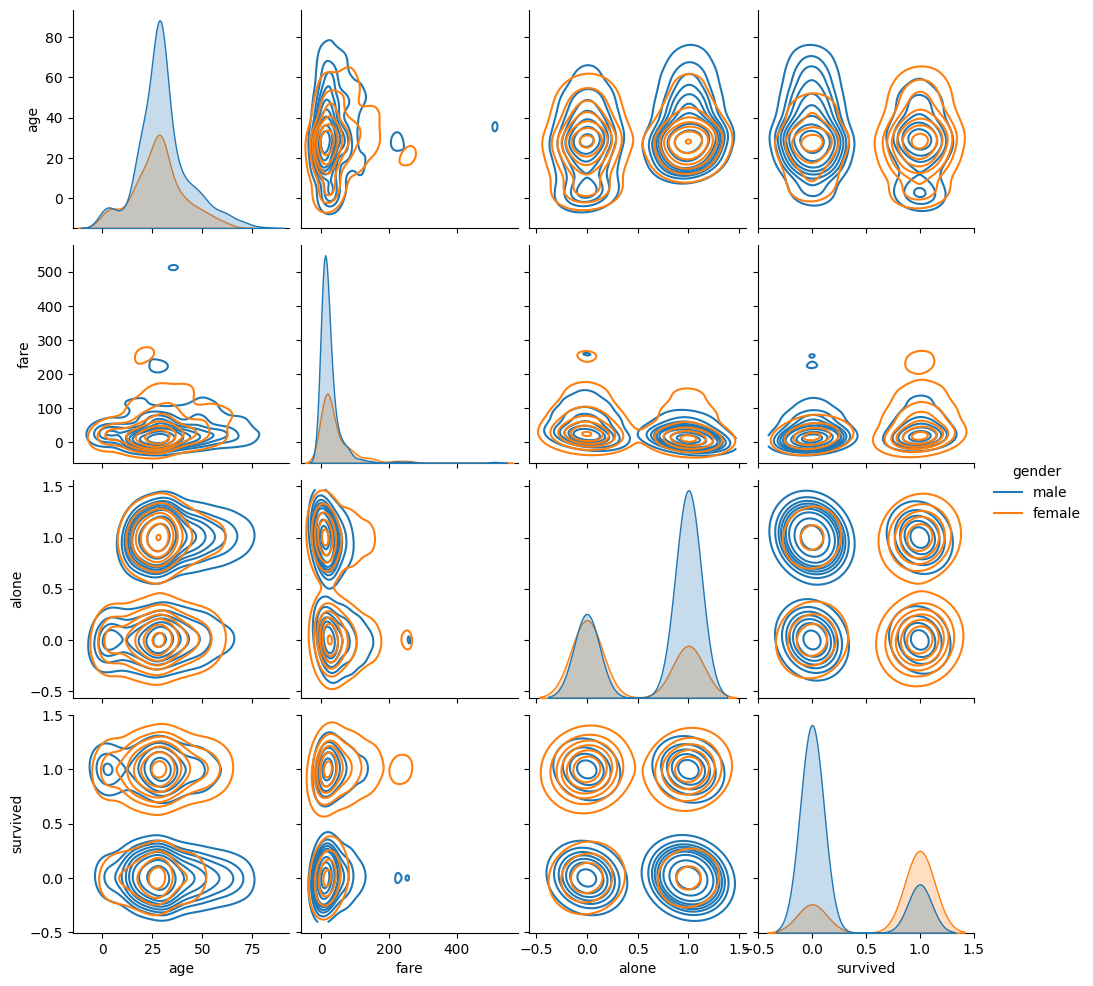

In [20]:
sns.pairplot(df,hue = "gender", kind = "kde")
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
for i in cols:
    df[i] = le.fit_transform(df[i])

In [26]:
df.head()

,gender,age,fare,class,who,alone,survived
0,1,22,7.2500,2,1,0,0
1,0,38,71.2833,0,2,0,1
2,0,26,7.9250,2,2,1,1
3,0,35,53.1000,0,2,0,1
4,1,35,8.0500,2,1,1,0


In [28]:
X = df.drop("survived",axis = 1)
y = df["survived"]

In [29]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 34)    

In [32]:
X_train

,gender,age,fare,class,who,alone
519,1,32,7.8958,2,1,1
704,1,26,7.8542,2,1,0
332,1,38,153.4625,0,1,0
267,1,25,7.7750,2,1,0
181,1,29,15.0500,1,1,1
...,...,...,...,...,...,...
758,1,34,8.0500,2,1,1
873,1,47,9.0000,2,1,1
490,1,29,19.9667,2,1,0
122,1,32,30.0708,1,1,0


In [33]:
y_train

519    0
704    0
332    0
267    1
181    0
      ..
758    0
873    0
490    0
122    0
417    1
Name: survived, Length: 668, dtype: int64

In [34]:
X_test

,gender,age,fare,class,who,alone
846,1,29,69.5500,2,1,0
572,1,36,26.3875,0,1,1
532,1,17,7.2292,2,1,0
714,1,52,13.0000,1,1,1
486,0,35,90.0000,0,2,0
...,...,...,...,...,...,...
7,1,2,21.0750,2,0,0
738,1,29,7.8958,2,1,1
211,0,35,21.0000,1,2,1
28,0,29,7.8792,2,2,1
